# **<IS833 Team 6 Project>**
**Team Members** 
- Claudia Tajima, Ditvaranan Denphaisal, Rahul Rao Natarajan, Victor Anubiri, Weidong Mi 

**Prjoect Goal** 
- Based on the analysis on COVID-19 virus data, Team 6 plan to present the spread of COVID-19 over time with animation and understand the differences between regions.

**Methogology**
- Analyzing and visualization the spread of COVID-19 across the world and in US.
- Normalizing the data and Comparing the effectiveness in different regions.
- Understanding the impact of a lockdown on the number of confirmed cases.


# Data

The data was downloaded from : [BigQuery Covid Public Dataset](https://console.cloud.google.com/marketplace/details/bigquery-public-datasets/covid19-public-data-program?_ga=2.161644604.-182987575.1582120489)

The data set includes information about location information of the regions and accumulated number of confirmed, deaths, active, recovered cases.

Each row represents a country or region in a specific day.

The columns contain attributes as below:

- "confirmed", "deaths", "active", "recovered" : accumulated cases on each day

- "province_state" : province/state in a specific country

- "latitude", "longitude", "location_geom": geographic information of the region

- "fips" : Federal Information Processing Standards (US data)

- "admin2", "combined_key" : region information (US data)

Basic information:

- There are ??? rows, ??? columns with ?? features
?? missing values (next item).

To begin, we need to import live COVID-19 case data from Big Query using pandas.


In [0]:
# EDA notebooke https://github.com/soltaniehha/Business-Analytics/blob/master/08-EDA/01-Exploratory-Data-Analysis.ipynb

In [0]:
#Using live data Covid data from Big Query

#import pandas as pd


#project_id = 'silicon-will-259515'
#sample_count = 2000

#df = pd.io.gbq.read_gbq(f'''
#  SELECT
#    *
#  FROM
#    `bigquery-public-data.covid19_jhu_csse.summary`
# ''',project_id=project_id)


In [0]:
#df.to_csv('df.csv')

# I. Import and trim the data
1.   We import the required data libraries with COVID-19 case data. 
2.   Next, because Big Query requires authentication, we use a static csv file from github.
3. Next, we identify discrepencies in the data - some countries have different names. We need to unify the names.
4. To clean up this data issue, we create a dictionary (called as dict) that has different names as key and the unified names as the value.
5. We use the .replace method to unify the different names.



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/rahulraonatarajan/Data/master/df%20(7).csv' #Used static file for development.
cf = pd.read_csv(url) #Using live data from Big query

In [100]:
# Unify country_region names
dict = {'Mainland China':'China', 'Korea, South':'South Korea', 'Republic of Korea':'South Korea', 
        'Iran (Islamic Republic of)':'Iran', 'Bahamas, The':'Bahamas', 'Taiwan*':'Taiwan',
        'United Kingdom':'UK', 'Viet Nam':'Vietnam', 'Gambia, The':'The Gambia', 'Hong Kong SAR':'Hong Kong'}
cf['country_region'] = cf['country_region'].replace(dict)
cf.head()

,Unnamed: 0,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,0,NaN,Netherlands,2020-02-28,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,NaN,UK,2020-02-09,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,NaN,India,2020-02-18,NaN,NaN,NaN,3.0,0.0,3.0,NaN,NaN,NaN,NaN
3,3,NaN,Spain,2020-02-13,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN
4,4,NaN,Philippines,2020-02-03,NaN,NaN,NaN,2.0,1.0,0.0,NaN,NaN,NaN,NaN


Next, we use the groupby and sum functions to specify dates and countries in the data. 



*   We use .groupby to group and sum based on country and date values.
*   We query the countries based on interest and confirmed numbers
*   usa_weekly - for weekly data
*   usa_daily - for daily data




In [0]:
# Sum up the confirmed case on each day for each country_region
af = cf.groupby(['date','country_region'],as_index=False).sum()

In [102]:
# Find out the top 10 countries with the most confirmed case on 2020-04-26
pivot = af.pivot_table(index=['country_region','date'])
pivot0426 = pivot.query('date=="2020-04-26"')
pivot0426.sort_values ('confirmed', ascending=False).head(10)

,,Unnamed: 0,active,confirmed,deaths,fips,latitude,longitude,recovered
country_region,date,,,,,,,,
US,2020-04-26,200344262,803914.0,965783.0,54881.0,89982078.0,107484.093136,-256449.307594,106988.0
Spain,2020-04-26,8613,85712.0,226629.0,23190.0,0.0,40.463667,-3.749220,117727.0
Italy,2020-04-26,8303,106103.0,197675.0,26644.0,0.0,41.871940,12.567380,64928.0
France,2020-04-26,603941,93649.0,162220.0,22890.0,0.0,91.463495,-238.646914,45681.0
Germany,2020-04-26,10532,39794.0,157770.0,5976.0,0.0,51.165691,10.451526,112000.0
UK,2020-04-26,1152148,132465.0,154037.0,20794.0,0.0,270.029898,-482.924666,778.0
Turkey,2020-04-26,9691,78185.0,110130.0,2805.0,0.0,38.963700,35.243300,29140.0
Iran,2020-04-26,7765,15114.0,90481.0,5710.0,0.0,32.427908,53.688046,69657.0
China,2020-04-26,589820,998.0,83912.0,4637.0,0.0,1083.336700,3684.419700,78277.0


In [103]:
usa_daily = af.query('country_region=="US" or country_region=="Spain" or country_region=="Italy" or \
country_region=="France" or country_region=="UK" or country_region=="Iran" or country_region=="China" or \
country_region=="Russia" or country_region=="Canada" or country_region=="South Korea"')
                      # Selected 8 countries from the top 10; 
                      # Selected South Korea because it is the first outbreaking country other than China
                      # Selected Canada because it is in North America and can be compared with US

usa_weekly = usa_daily.query('date=="2020-01-12" or date=="2020-01-19" or date=="2020-01-26" or date=="2020-02-02" or date=="2020-02-09" or \
                              date=="2020-02-16" or date=="2020-02-23" or date=="2020-02-29" or date=="2020-03-01" or date=="2020-03-08" or \
                              date=="2020-03-15" or date=="2020-03-22" or date=="2020-03-29" or date=="2020-03-30" or date=="2020-04-01" or \
                              date=="2020-04-08" or date=="2020-04-15" or date=="2020-04-22"')
usa_weekly.tail()

,date,country_region,Unnamed: 0,latitude,longitude,confirmed,deaths,recovered,active,fips
9467,2020-04-22,Russia,9549,61.524010,105.318756,57999.0,513.0,4420.0,53066.0,0.0
9484,2020-04-22,South Korea,13772,35.907757,127.766922,10694.0,238.0,8277.0,2179.0,0.0
9486,2020-04-22,Spain,8604,40.463667,-3.749220,208389.0,21717.0,85915.0,100757.0,0.0
9501,2020-04-22,UK,1152208,270.029898,-482.924666,134638.0,18151.0,683.0,115804.0,0.0
9502,2020-04-22,US,197417081,105989.903546,-252645.337520,840220.0,46622.0,77366.0,716232.0,88283316.0


# II. Visualize the data

**1. Global Data**

To visualize the daily accumulated confirmed cases in a graph, we create a plot using seaborn with the "usa_daily" data. 

(1) We use sns lineplot to plot the daily cases

(2) To make the x axis more readable we use xticks to set the axis date labels



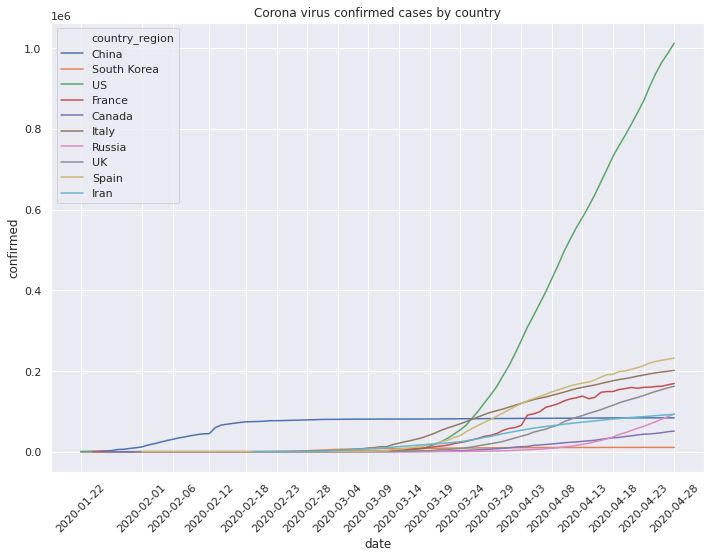

In [104]:
# Create the daily line plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.lineplot(x='date',y='confirmed',data=usa_daily,hue='country_region',legend='brief',)

# Trim the x-axis
d_list = usa_daily['date'].iloc[::50] 
fig.set_xticklabels(d_list,rotation=45)
fig.set_xticks(d_list)
# Set a title for the plot
fig.set_title('Corona virus confirmed cases by country');

To visualize the weekly confirmed cases data in a graph, we create a plot using seaborn with the "usa_weekly" data. 

Text(0.5, 1.0, 'Corona virus weekly confirmed cases by country')

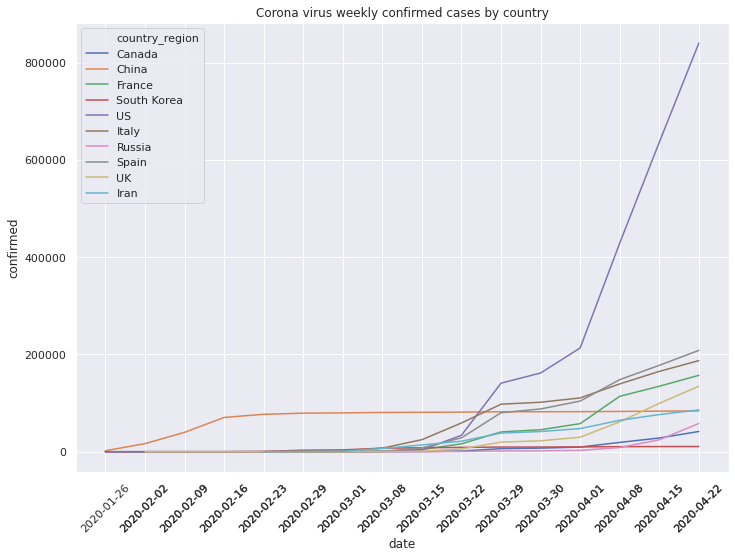

<Figure size 1440x1152 with 0 Axes>

In [105]:
# Create the weekly line plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig1 = sns.lineplot(x='date',y='confirmed',data=usa_weekly,hue='country_region')
plt.figure(figsize=(20,16)) 
d_list = usa_weekly['date'].iloc[::5]
fig1.set_xticklabels(d_list,rotation=45)
fig1.set_xticks(d_list)
fig1.set_title('Corona virus weekly confirmed cases by country')

To create an animated visualization of confirmed COVID-19 cases over time, we use plotly.express. Plotly enables us to create a visual timeline of confirmed cases on the World Map using bubbles that grow as case numbers increase. This visualization shows us how the virus starts in China and spreads quickly across the globe in March, with the United States having the most confirmed cases at the end of the animation. This visualization allows the user to hover over countries to view more data at that moment in time.  

In [106]:
# Visualize the change of confirmed cases over time on the World Map using plotly.express
import plotly.express as px
fig = px.scatter_geo(af, locations="country_region",locationmode="country names" ,
                     hover_name="country_region", size="confirmed",size_max=45,
                     animation_frame="date",
                     projection="natural earth")
fig.show()

We can also use heatmap color coding with plotly to display volume of confirmed COVID-19 cases in countries across the world. The United States leads the world by a significant margin in number of COVID-19 cases to date, resulting in its bright yellow color as compared to the rest of the countries of the world depicted in dark blues and purples. 

In [107]:
# Visualize the data on a heatmap
import plotly.express as px
mf = af.query('date=="2020-04-26"')
fig = px.choropleth(mf, locations="country_region",locationmode='country names',
                    color="confirmed", # Confirmed corona virus cases
                    hover_name="country_region",hover_data=['confirmed','deaths'],title='Confirmed Cases on April 26', # to be updated
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

**2. US Data**

To create a timeline visualization of confirmed COVID-19 cases in the U.S., we use plotly and a new data set. To graph case counts in the states in the U.S. we need to use ISO(International Organization for Standardization) values. This requires us to merge the COVID-19 dataframe (zf) with the ISO dataframe which has the ISO values("Abbreviation") for states. 




In [108]:
# Sum up the confirmed case on each day for each province_state under the country_region 
zf = cf.groupby(['date','country_region','province_state'],as_index=False).sum()

# Import regional data - ISO
iso = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv') 

# Merge the dataframe and query US data
zf = pd.merge(zf,iso,left_on='province_state',right_on='State')
zf = zf.query('country_region=="US"')
zf.head()

,date,country_region,province_state,Unnamed: 0,latitude,longitude,confirmed,deaths,recovered,active,fips,State,Abbreviation
0,2020-01-22,US,Washington,115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Washington,WA
1,2020-01-23,US,Washington,1360,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Washington,WA
2,2020-01-24,US,Washington,352,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Washington,WA
3,2020-01-25,US,Washington,1361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Washington,WA
4,2020-01-26,US,Washington,2234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Washington,WA


**Timeline of infection rising by state**

This map shows the confirmed cases by states updated daily. The date starts from January 22 and ends at April 12. The numbers of cases are illustrated by different colors. This visualization also allows the user to hover over states to view more data at that moment in time.

In [109]:
# Visualize the change of confirmed cases in different states over time on the US Map
import plotly.express as px
fig = px.choropleth(zf, locations="Abbreviation",locationmode="USA-states" ,
                     hover_name="State",color='confirmed',color_continuous_scale='Reds',
                     animation_frame="date",
                     projection="albers usa")
fig.show()

Since NY is an outlier that is much higher than the other states, we created another animation without NY.

In [110]:
# Create another animation without the outlier - NY.
fig = px.choropleth(zf[zf['province_state'] != 'New York'], locations="Abbreviation",locationmode="USA-states" ,
                     hover_name="State",color='confirmed',color_continuous_scale='Reds',
                     animation_frame="date",
                     projection="albers usa",title='Total confirmed without NY')
fig.show() 

**State wise cases per million**

First we found the population of each state and import the data

In [111]:
state_url = 'https://raw.githubusercontent.com/CivilServiceUSA/us-states/master/data/states.csv'
pop = pd.read_csv(state_url)
pop.drop(pop.columns.difference(['code','state','population']), 1, inplace=True)
pop.head()

,state,code,population
0,Alabama,AL,4833722
1,Alaska,AK,735132
2,Arizona,AZ,6626624
3,Arkansas,AR,2959373
4,California,CA,38332521


Create a dataframe "nzf" by merging the "pop" to "zf", and then divid the confirmed cases by each state's population in order to find the normalized data.

In [112]:
import plotly.express as px

# Normalization
nzf = zf.merge(pop, left_on='Abbreviation', right_on='code')
nzf["per1m"] = nzf['confirmed'] / nzf['population'] *1000000

# Visualize the normalized data
fig = px.choropleth(nzf, locations="Abbreviation",locationmode="USA-states" ,
                     hover_name="State",color='per1m',color_continuous_scale='Reds',
                     animation_frame="date",
                     projection="albers usa",title='Cases per 1 million people')

fig.show()


In [113]:
# Query the normalized data on 2020-04-26
azf = nzf.query('date=="2020-04-26"')

# Visualize the data in a bar chart
fig = px.bar(azf, x='code', y='per1m',color='code',title='State wise Cases per million')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

# III. Cases Per Day After Lockdown

In [114]:
# Calculating new cases per day
mass = zf.query('Abbreviation=="MA"')
mass['new_cases'] = mass.confirmed.diff()


ny = zf.query('Abbreviation=="NY"')
ny['new_cases'] = ny.confirmed.diff()


ca = zf.query('Abbreviation=="CA"')
ca['new_cases'] = ca.confirmed.diff()

ch = cf.query('country_region=="China"')
ch = ch.sort_values(by='date')
ch = ch.groupby(['date','country_region'],as_index=False).sum()
ch['new_cases'] = ch.confirmed.diff()
ch.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,date,country_region,Unnamed: 0,latitude,longitude,confirmed,deaths,recovered,active,fips,new_cases
93,2020-04-24,China,589753,1083.3367,3684.4197,83899.0,4636.0,78109.0,1154.0,0.0,15.0
94,2020-04-25,China,589824,1083.3367,3684.4197,83909.0,4636.0,78175.0,1098.0,0.0,10.0
95,2020-04-26,China,589820,1083.3367,3684.4197,83912.0,4637.0,78277.0,998.0,0.0,3.0
96,2020-04-27,China,589891,1083.3367,3684.4197,83918.0,4637.0,78374.0,907.0,0.0,6.0
97,2020-04-28,China,589767,1083.3367,3684.4197,83940.0,4637.0,78422.0,881.0,0.0,22.0


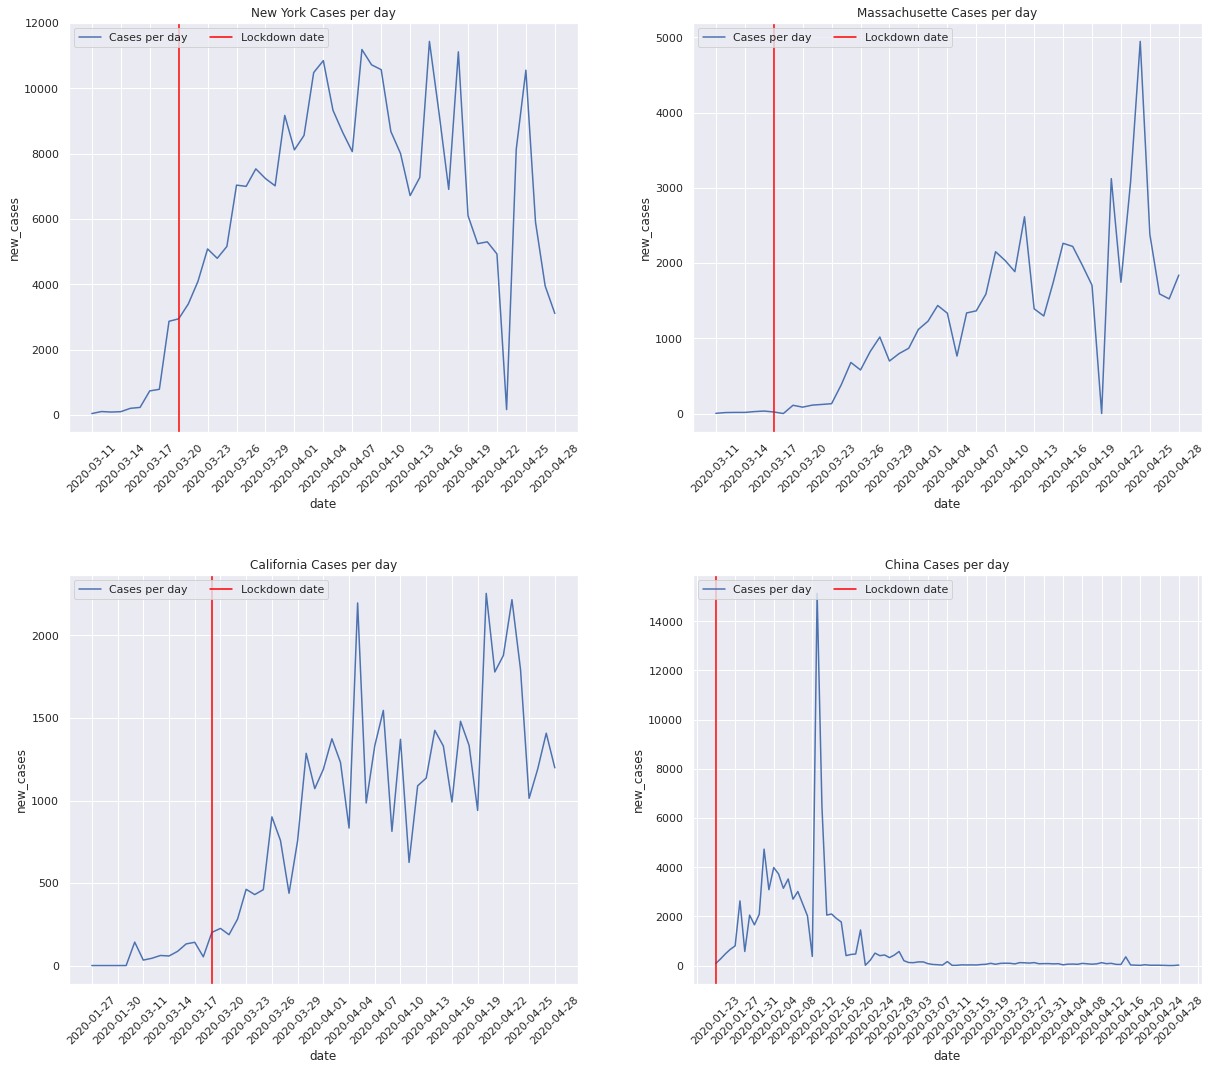

In [115]:
# Visualize the daily cases and lockdown date

import matplotlib.ticker as ticker

f, ax = plt.subplots(figsize=(18,16))

plt.subplot(2,2,1)
NY_Case = sns.lineplot(x='date', y='new_cases', data=ny,label='Cases per day');
NY_Case.set_title('New York Cases per day')
NY_Case.axvline(x='2020-03-20',color='red',label='Lockdown date')
NY_Case.legend(ncol=2, loc='upper left', frameon=True)
plt.xticks(rotation=45)
NY_Case.xaxis.set_major_locator(ticker.MultipleLocator(3))


plt.subplot(2,2,2)
MA_Case = sns.lineplot(x='date', y='new_cases', data=mass,label='Cases per day');
MA_Case.set_title('Massachusette Cases per day')
MA_Case.axvline(x='2020-03-17',color='red',label='Lockdown date')
MA_Case.legend(ncol=2, loc='upper left', frameon=True)
plt.xticks(rotation=45)
MA_Case.xaxis.set_major_locator(ticker.MultipleLocator(3))

plt.subplot(2,2,3)
CA_Case = sns.lineplot(x='date', y='new_cases', data=ca,label='Cases per day');
CA_Case.set_title('California Cases per day')
CA_Case.axvline(x='2020-03-19',color='red',label='Lockdown date')
CA_Case.legend(ncol=2, loc='upper left', frameon=True)
plt.xticks(rotation=45)
CA_Case.xaxis.set_major_locator(ticker.MultipleLocator(3))

plt.subplot(2,2,4)
China_Case = sns.lineplot(x='date', y='new_cases', data=ch, ci=False,label='Cases per day');
China_Case.set_title('China Cases per day')
China_Case.axvline(x='2020-01-23',color='red',label='Lockdown date')
China_Case.legend(ncol=2, loc='upper left', frameon=True)
plt.xticks(rotation=45)
China_Case.xaxis.set_major_locator(ticker.MultipleLocator(4))

f.tight_layout(pad=4)




# IV. Prediction Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



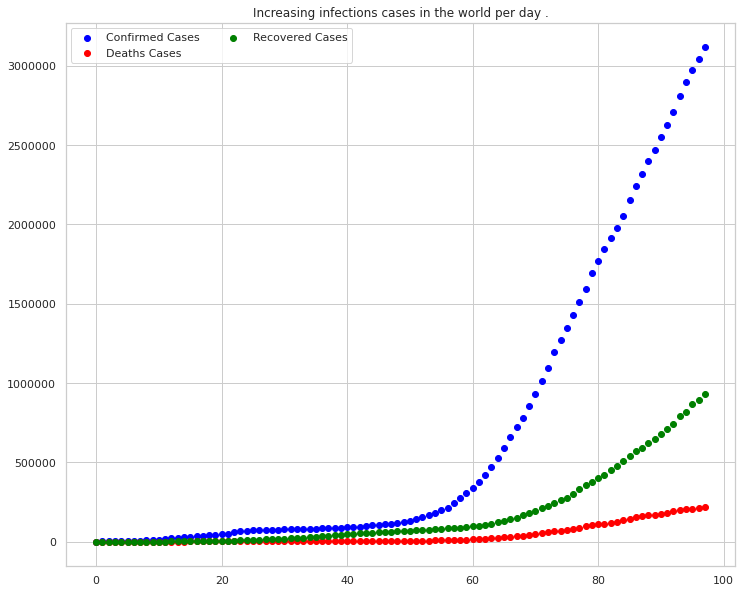

In [116]:
cases_per_Day = af.groupby(["date"])['confirmed','deaths', 'recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.confirmed
y1=cases_per_Day.deaths
y2=cases_per_Day.recovered


sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12,10 ))

plt.scatter(x,y,color='blue' , label='Confirmed Cases')
plt.scatter(x,y1,color='red' ,label="Deaths Cases")
plt.scatter(x,y2,color='green',label="Recovered Cases")
plt.title("Increasing infections cases in the world per day .")
ax.legend(ncol=2, loc='upper left', frameon=True)
ax.ticklabel_format(useOffset=False, style='plain')
ranger = [1000,]

plt.show()

# Predicting total number of Covid cases worldwide

First we visualize the number of confirmed cases, deaths , and recoveries per day.

# We seperate the features from the prediction set

In [0]:
#Train & test Data 
x_data=pd.DataFrame(cases_per_Day.index)
y_data=pd.DataFrame(cases_per_Day.confirmed)

Split the training data from the test data

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Linear regression

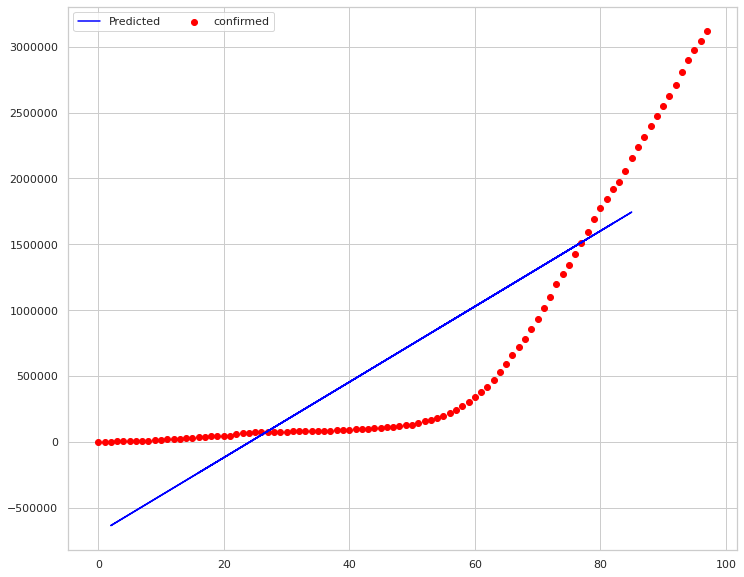

In [120]:
model.predict(x_test)
f, ax = plt.subplots(figsize=(12,10 ))
plt.scatter(x,y,color='red',label='confirmed')
plt.plot(x_test,model.predict(x_test),color='blue',label='Predicted')
ax.legend(ncol=2, loc='upper left', frameon=True)
ax.ticklabel_format(useOffset=False, style='plain')

# Polynomial Regression

In [121]:
#Polynomial Regression (degree=8)
poly_reg=PolynomialFeatures(degree=8)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



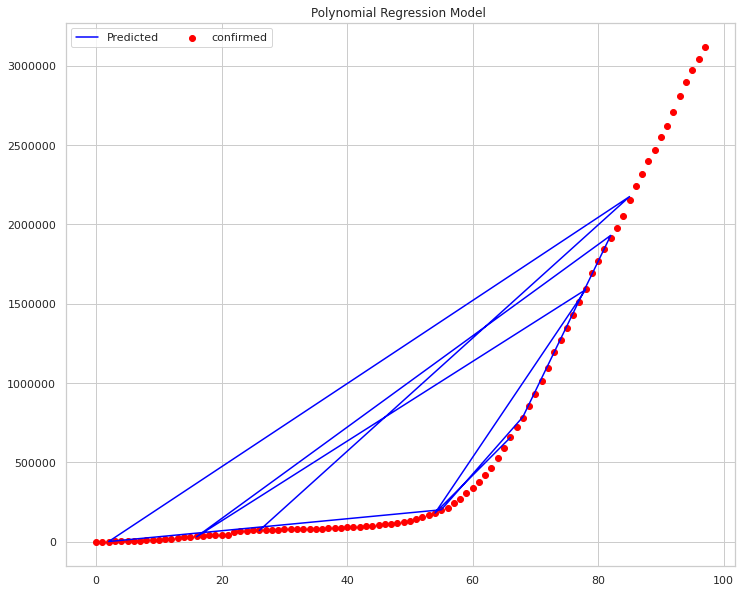

In [122]:
cases_per_Day = af.groupby(["date"])['confirmed','deaths', 'recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.confirmed
f, ax = plt.subplots(figsize=(12,10 ))
plt.scatter(x,y,color='red',label='confirmed')
plt.plot(x_test,lin_reg2.predict(poly_reg.fit_transform(x_test)),color='blue',label='Predicted')
plt.title("Polynomial Regression Model ")
ax.legend(ncol=2, loc='upper left', frameon=True)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

# Prediction vs Actual values

In [123]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9998637077622655

In [124]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))

result=pd.DataFrame(y_pred)
result['Real Value']=y_test.iloc[:,:].values
result['Predicted Value']=pd.DataFrame(y_pred).astype(int)
result=result[['Real Value','Predicted Value']]
result

,Real Value,Predicted Value
0,73260.0,70643
1,2152647.0,2175844
2,941.0,998
3,197168.0,201249
4,782389.0,786703
5,1917320.0,1931228
6,34392.0,30804
7,1595350.0,1588821
8,181546.0,180349
9,660693.0,656676
